# 1. Assume that the inputs $X$ to some scalar function $f$ are $n*m$ matrices. What is the dimensionality of the gradient of $f$ with respect to $X$?

The dimensionality of the gradient of $f$ with respect to $X$ remains $n \times m$, which matches the dimensionality of the input matrix $X$.

# 2. Add a bias to the hidden layer of the model described in this section (you do not need to include bias in the regularization term).
- Draw the corresponding computational graph.
- Derive the forward and backward propagation equations.

In [1]:
import sys
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import warnings
from torchviz import make_dot
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings('ignore')

class WeightDecayMLPScratch(d2l.MulMLPScratch):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__(num_inputs, num_outputs, num_hiddens, lr, sigma=0.01)
        
    def loss(self, y_hat, y, averaged=True):
        y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
        y = y.reshape((-1,))
        return F.cross_entropy(y_hat, y, reduction='mean' 
                               if averaged else 'none') + sum([w.norm().item() for iw in self.W])

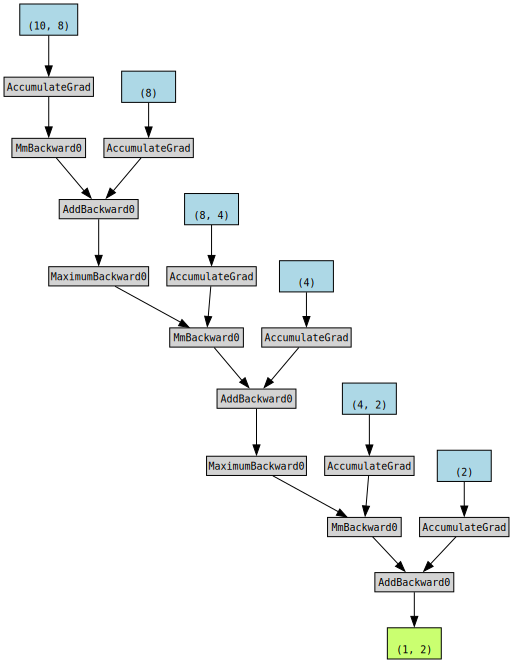

In [3]:
input_shape = 10
model = WeightDecayMLPScratch(num_inputs = input_shape, num_outputs=2, num_hiddens=[8,4], lr=0.1)

x = torch.randn(1, 10)
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

# 3. Compute the memory footprint for training and prediction in the model described in this section.

In [5]:
import torch
import torch.nn as nn
from torchsummary import summary

# Define your model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
model = MyModel()

# Define input size (batch size, channels, height, width)
input_size = (1, 1, 28, 28)

# Use torchsummary to compute memory usage
summary(model, input_size=input_size, device="cpu")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (56x28 and 784x256)

In [4]:
from torchsummary import summary
summary(model, input_size=input_shape, device="cpu")

TypeError: 'int' object is not iterable

# 4. Assume that you want to compute second derivatives. What happens to the computational graph? How long do you expect the calculation to take?

# 5. Assume that the computational graph is too large for your GPU.
- Can you partition it over more than one GPU?
- What are the advantages and disadvantages over training on a smaller minibatch?